Jupyter notebook for project

NLP applied to Kaggle dataset
Dataset here:
https://www.kaggle.com/datasets/stackoverflow/stacksample

Relevant NLP example:
https://github.com/Idilismiguzel/NLP-with-Python/blob/master/Text-Classification.ipynb


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import set_style

from ast import literal_eval

set_style("whitegrid")

## Read in the data (part of it) and just look at it for a bit

In [2]:
questions = pd.read_csv("archive/questions_cleaned.csv", nrows=25000, 
                        converters={'cleaned_body': literal_eval})
#answers = pd.read_csv("archive/Answers.csv", encoding = "ISO-8859-1", nrows=5000)
#tags = pd.read_csv("archive/Tags.csv", encoding = "ISO-8859-1", nrows=5000)

In [3]:
questions.sample(5, random_state=234)

,Unnamed: 0,Unnamed: 0.1,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body,body_text,cleaned_body
23409,23409,23409,1265810,NaN,2009-08-12T12:18:41Z,NaN,1,Prevent file from being edit,<p>What's the smartest way to prevent a textfi...,What's the smartest way to prevent a textfile ...,"[smart, way, prevent, textfile, e.g., xml, get..."
556,556,556,49870,5056.0,2008-09-08T14:58:06Z,NaN,7,I understand threading in theory but not in pr...,<p>I have a basic cs-major understanding of mu...,I have a basic cs-major understanding of multi...,"[basic, cs, major, understanding, multi, threa..."
22402,22402,22402,1223510,NaN,2009-08-03T17:18:23Z,NaN,0,Mpi function define,<p>I wrote a program in c using MPI (Message P...,I wrote a program in c using MPI (Message Pass...,"[write, program, c, MPI, Message, Passing, Int..."
14462,14462,14462,857620,2759376.0,2009-05-13T12:13:12Z,NaN,0,Query about shared library performance,<p>I have a question about performance differe...,I have a question about performance difference...,"[question, performance, difference, perspectiv..."
19904,19904,19904,1109830,NaN,2009-07-10T14:21:59Z,NaN,0,InternetAttemptConnect causing crash C++,<p>I have an app that uses the wininet librari...,I have an app that uses the wininet libraries ...,"[app, use, wininet, library, server, posting, ..."


In [6]:
print(questions.iloc[23409].body_text)

What's the smartest way to prevent a textfile (e.g. xml) from getting edit by a user? 
I need to make sure that the file in which I store the usernames and there privileges for the desktop application can't be simply edited. 
Maybe I can generate a certificate of the file and the desktop applications checks this?
I'm using C# in a WinForms app.



In [7]:
print(questions.iloc[23409].cleaned_body)

['smart', 'way', 'prevent', 'textfile', 'e.g.', 'xml', 'get', 'edit', 'user', 'need', 'sure', 'file', 'store', 'username', 'privilege', 'desktop', 'application', 'simply', 'edit', 'maybe', 'generate', 'certificate', 'file', 'desktop', 'application', 'check', 'c', 'WinForms', 'app']


In [112]:
#answers.sample(5,random_state=505)

In [113]:
#print(answers.iloc[4162].Body)

In [114]:
#tags.sample(5, random_state=23)

## Confirm we actually read in as many rows as we thought, then count how many of those questions have been closed

In [8]:
np.shape(questions)[0]

25000

In [9]:
count = 0
for i in range(0,np.shape(questions)[0]):
    if pd.isna(questions.iloc[i].ClosedDate):
        count = count+1
        
print(count)

23805


In [10]:
np.shape(questions)[0] - count

1195

In [11]:
questions['Closed'] = 1
for i in range(0,np.shape(questions)[0]):
    if pd.isna(questions.iloc[i].ClosedDate):
        questions['Closed'].iloc[i] = 0

questions.head(5)

D:\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Unnamed: 0,Unnamed: 0.1,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body,body_text,cleaned_body,Closed
0,0,0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,I've written a database generation script in S...,"[write, database, generation, script, SQL, wan...",0
1,1,1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,Are there any really good tutorials explaining...,"[good, tutorial, explain, branching, merge, Ap...",1
2,2,2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,Has anyone got experience creating SQL-based A...,"[get, experience, create, SQL, base, ASP.NET, ...",0
3,3,3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,This is something I've pseudo-solved many time...,"[pseudo, solve, time, find, solution, stick, p...",0
4,4,4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,I have a little game written in C#. It uses a ...,"[little, game, write, C, use, database, end, t...",0


## Start looking at the scores. How many of these first 5000 questions have what score?

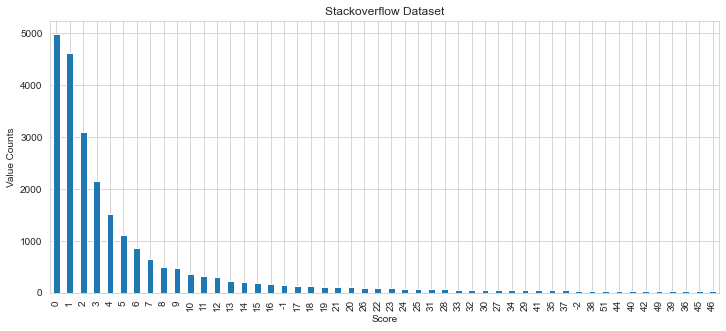

In [12]:
ax = questions['Score'].value_counts()[0:50].plot(kind='bar', figsize=(12,5))
fig = ax.get_figure()
ax.set_title("Stackoverflow Dataset")
ax.set_xlabel('Score')
ax.set_ylabel('Value Counts');

In [13]:
totals = questions['Score'].value_counts()

numbers = 0
for i in range(0,np.shape(totals)[0]):
    numbers = numbers + totals.iloc[i]

print(numbers)

25000


In [14]:
np.shape(totals)

(367,)

In [15]:
print(totals)

0      4988
1      4622
2      3101
3      2153
4      1519
       ... 
670       1
171       1
374       1
313       1
440       1
Name: Score, Length: 367, dtype: int64


## Find average score for this subset of data

In [16]:
print("Sum of scores for these questions is:", questions['Score'].sum())
print("Total number of questions is:", np.shape(questions)[0])
print("Number of unique score values is:", np.shape(totals)[0])

Sum of scores for these questions is: 314904
Total number of questions is: 25000
Number of unique score values is: 367


In [17]:
print("Mean of these scores is:", questions['Score'].mean())
print("Manual check of that mean:", questions['Score'].sum()/np.shape(questions)[0])
print("Median of these scores is:", questions['Score'].median())

Mean of these scores is: 12.59616
Manual check of that mean: 12.59616
Median of these scores is: 2.0


## Is there a connection between "closed" and "score"?

In [18]:
open_questions = questions[pd.isna(questions['ClosedDate'])].copy()
np.shape(open_questions)[0]

23805

In [19]:
closed_questions = questions[pd.notna(questions['ClosedDate'])].copy()
np.shape(closed_questions)[0]

1195

In [20]:
print("Sum of scores for these open questions is:", open_questions['Score'].sum())
print("Total number of open questions is:", np.shape(open_questions)[0])
print("Number of unique score values is:", np.shape(open_questions['Score'].value_counts())[0])
print("Mean of these open question scores is:", open_questions['Score'].mean())
print("Median of these open question scores is:", open_questions['Score'].median())

Sum of scores for these open questions is: 288034
Total number of open questions is: 23805
Number of unique score values is: 354
Mean of these open question scores is: 12.099726948120143
Median of these open question scores is: 2.0


In [21]:
print("Sum of scores for these closed questions is:", closed_questions['Score'].sum())
print("Total number of closed questions is:", np.shape(closed_questions)[0])
print("Number of unique score values is:", np.shape(closed_questions['Score'].value_counts())[0])
print("Mean of these closed question scores is:", closed_questions['Score'].mean())
print("Median of these closed question scores is:", closed_questions['Score'].median())

Sum of scores for these closed questions is: 26870
Total number of closed questions is: 1195
Number of unique score values is: 138
Mean of these closed question scores is: 22.485355648535563
Median of these closed question scores is: 6.0


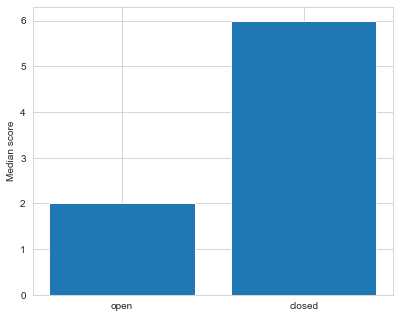

In [22]:
fig = plt.figure(figsize=(5,4))
ax = fig.add_axes([0,0,1,1])
status = ['open', 'closed']
values = [open_questions['Score'].median(),closed_questions['Score'].median()]
ax.bar(status, values)
ax.set_ylabel("Median score")
plt.show()

So maybe there's a correlation between whether a question is closed/open and its score. That is, here at least, closed questions have a higher median score than open questions. Thus we should determine what properties of a question (the actual words) lead to a question becoming closed.

## Manually construct a different-proportioned dataset

In [23]:
halfset = pd.concat([open_questions[0:1000], closed_questions[0:500]])

In [24]:
halfset.tail(5)

,Unnamed: 0,Unnamed: 0.1,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body,body_text,cleaned_body,Closed
7193,7193,7193,487430,17648.0,2009-01-28T12:22:40Z,2014-10-06T06:24:12Z,5,Validate inputs that are not inside a form wit...,<p>How can I validate some inputs that are not...,How can I validate some inputs that are not in...,"[validate, input, inside, form, tag, sample, f...",1
7207,7207,7207,488250,3056.0,2009-01-28T16:19:58Z,2013-02-03T22:11:14Z,44,c# compare two generic values,<blockquote>\n <p><strong>Possible Duplicate:...,\nPossible Duplicate:\nCanÃ¢ÂÂt operator == ...,"[Possible, Duplicate, CanÃ¢ÂÂt, operator, =,...",1
7229,7229,7229,489720,7856.0,2009-01-28T22:35:02Z,2014-03-06T14:48:43Z,212,What are some common uses for Python decorators?,<p>While I like to think of myself as a reason...,While I like to think of myself as a reasonabl...,"[like, think, reasonably, competent, Python, c...",1
7236,7236,7236,490420,9931.0,2009-01-29T03:48:51Z,2012-09-13T20:58:33Z,142,Favorite (Clever) Defensive Programming Best P...,<p>If you had to choose your <strong>Favorite<...,If you had to choose your Favorite (clever) te...,"[choose, Favorite, clever, technique, defensiv...",1
7250,7250,7250,490860,18615.0,2009-01-29T08:18:09Z,2015-06-09T01:57:25Z,0,Does modified Open Source code HAS-TO-BE open-...,"<p>We have taken an open-source application, r...","We have taken an open-source application, rele...","[take, open, source, application, release, GPL...",1


## Choose which dataset to run the rest of the notebook with

In [25]:
dataset = halfset
# dataset = questions

## Secondary cleaning

In [26]:
import re

In [27]:
def clean_text(text):

    for i in range(0,len(text)):
        # remove the random non-ascii characters
        text[i] = text[i].encode("ascii", "ignore").decode()
        
        # remove numbers
        text[i] = re.sub(r'[0-9]+', '', text[i])
        
        # remove anything that isn't a word or whitespace
        text[i] = re.sub(r'[^\w\s]', '', text[i])    
        
        # remove short words with 1 to 3 characters
        shortword = re.compile(r'\W*\b\w{1,3}\b')
        text[i] = shortword.sub('', text[i])
        
        
    # some of the above re calls replaced things with empty strings, so now let's remove those    
    while("" in text) :
        text.remove("")    
        
    return text

In [28]:
dataset['cleaned_body'] = list(map(clean_text, dataset.cleaned_body))

In [29]:
dataset.head(3)

,Unnamed: 0,Unnamed: 0.1,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body,body_text,cleaned_body,Closed
0,0,0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,I've written a database generation script in S...,"[write, database, generation, script, want, ex...",0
2,2,2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,Has anyone got experience creating SQL-based A...,"[experience, create, base, ASPNET, site, provi...",0
3,3,3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,This is something I've pseudo-solved many time...,"[pseudo, solve, time, find, solution, stick, p...",0


In [30]:
dataset['Body'].iloc[1]

"<p>Has anyone got experience creating <strong>SQL-based ASP.NET</strong> site-map providers?</p>\n\n<p>I've got the default XML file <code>web.sitemap</code> working properly with my Menu and <strong>SiteMapPath</strong> controls, but I'll need a way for the users of my site to create and modify pages dynamically.</p>\n\n<p>I need to tie page viewing permissions into the standard <code>ASP.NET</code> membership system as well.</p>\n"

In [31]:
dataset['body_text'].iloc[1]

"Has anyone got experience creating SQL-based ASP.NET site-map providers?\nI've got the default XML file web.sitemap working properly with my Menu and SiteMapPath controls, but I'll need a way for the users of my site to create and modify pages dynamically.\nI need to tie page viewing permissions into the standard ASP.NET membership system as well.\n"

In [32]:
dataset['cleaned_body'].iloc[1]

['experience',
 'create',
 'base',
 'ASPNET',
 'site',
 'provider',
 'default',
 'file',
 'websitemap',
 'work',
 'properly',
 'Menu',
 'SiteMapPath',
 'control',
 'need',
 'user',
 'site',
 'create',
 'modify',
 'page',
 'dynamically',
 'need',
 'page',
 'view',
 'permission',
 'standard',
 'aspnet',
 'membership',
 'system']

In [33]:
dataset[['Id', 'Score', 'Title', 'Body', 'body_text', 'cleaned_body', 'Closed']].sample(3, random_state=151)

,Id,Score,Title,Body,body_text,cleaned_body,Closed
469,42710,3,Efficient synthesis of a 4-to-1 function in Ve...,<p>I need to implement a 4-to-1 function in Ve...,I need to implement a 4-to-1 function in Verio...,"[need, implement, function, Veriog, input, num...",0
579,51320,16,Find all drive letters in Java,<p>For a project I'm working on. I need to loo...,For a project I'm working on. I need to look f...,"[project, work, need, look, executable, filesy...",0
1263,105710,13,What is a good functional language on which to...,<p>Is there a functional language that has goo...,Is there a functional language that has good s...,"[functional, language, good, support, tool, bu...",1


In [34]:
dataset['Body'].iloc[469]

'<p>I was looking out for a free plugin for developing/debugging JSP pages in eclipse.<br />\nAny suggestions? </p>\n'

In [35]:
dataset['body_text'].iloc[469]

'I was looking out for a free plugin for developing/debugging JSP pages in eclipse.\nAny suggestions? \n'

In [36]:
dataset['cleaned_body'].iloc[469]

['look', 'free', 'plugin', 'develop', 'debug', 'page', 'eclipse', 'suggestion']

## Now back to the Bag of Words bits

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
onegram_converter = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)  # this is the name of the model, so we're just making the object

x = onegram_converter.fit_transform(dataset['cleaned_body'])     # we fit the model to our words

words = onegram_converter.get_feature_names_out()       # "words" is now a list of all the words in our document

print(words)                                           # this would print all the unique words in our document
len(words)                                              # this is the number of unique words in our document

['ABCDE' 'ABCDEFGHIJKLMNOPQRSTUVWXYZ' 'AClass' ... 'zone' 'zoom' 'zooming']


9939

In [39]:
twogram_converter = CountVectorizer(tokenizer=lambda doc: doc, ngram_range=[2,2], lowercase=False)                                                        
x2 = twogram_converter.fit_transform(dataset['cleaned_body'])         

bigrams = twogram_converter.get_feature_names_out()       # "bigrams" is now a list of all the 2-word combinations in our document

print(bigrams)                                           # this would print all the unique 2-words in our document
len(bigrams)    

['ABCDE time' 'ABCDEFGHIJKLMNOPQRSTUVWXYZ field_size' 'AClass DoSomething'
 ... 'zoom slider' 'zooming comment' 'zooming want']


49863

In [40]:
threegram_converter = CountVectorizer(tokenizer=lambda doc: doc, ngram_range=[3,3], lowercase=False)                                                        
x3 = threegram_converter.fit_transform(dataset['cleaned_body'])         

trigrams = threegram_converter.get_feature_names_out()       # "trigrams" is now a list of all the 3-word combinations in our document

print(trigrams)                                           # this would print all the unique 3-words in our document
len(trigrams)    

['ABCDE time year' 'ABCDEFGHIJKLMNOPQRSTUVWXYZ field_size medium'
 'AClass DoSomething Start' ... 'zoom slider overview'
 'zooming comment suggestion' 'zooming want great']


55945

# Onward to actually doing the data science bit

## Bag of Words

In [41]:
from sklearn.linear_model import LogisticRegression
import sklearn.model_selection
import sklearn.preprocessing as preproc
from sklearn.feature_extraction import text

In [42]:
training_data, test_data = sklearn.model_selection.train_test_split(dataset.copy(), shuffle=True, 
                                                                    test_size = 0.3, random_state=961,
                                                                    stratify = dataset.Closed)

In [43]:
print(training_data.shape)
print(test_data.shape)

(1050, 12)
(450, 12)


Note that the stratify keyword preserves the number of 'Closed' questions in the training and test sets.

In [44]:
print("Ratio of closed to open in all:\n", dataset.Closed.value_counts(normalize=True))
print("Ratio in training data:\n", training_data.Closed.value_counts(normalize=True))
print("Ratio in test data:\n", test_data.Closed.value_counts(normalize=True))

Ratio of closed to open in all:
 0    0.666667
1    0.333333
Name: Closed, dtype: float64
Ratio in training data:
 0    0.666667
1    0.333333
Name: Closed, dtype: float64
Ratio in test data:
 0    0.666667
1    0.333333
Name: Closed, dtype: float64


Make the model and fit it. Here, I'm just making a bag of words (and not a bag of n-grams).

In [45]:
bow_transform = CountVectorizer(tokenizer=lambda doc: doc, ngram_range=[1,1], lowercase=False) 

In [46]:
X_tr_bow = bow_transform.fit_transform(training_data['cleaned_body'])

Check the number of unique words. Note it's smaller than the onegram above because the model has only seen the questions from the training set.

In [47]:
len(bow_transform.vocabulary_)

7872

This method shows us the actual "words" we've put in the bag.

In [48]:
bow_transform.get_feature_names_out()

array(['ABCDEFGHIJKLMNOPQRSTUVWXYZ', 'AClass', 'ADONET', ..., 'zone',
       'zoom', 'zooming'], dtype=object)

And this methods shows us how to map from a word to the index in the bag "array" where that word appears, e.g. 'write' appears at index 16350.

In [49]:
first10pairs = {k: bow_transform.vocabulary_[k] for k in list(bow_transform.vocabulary_)[:10]}

print(first10pairs)

{'time': 7271, 'value': 7590, 'type': 7396, 'datetimetime': 3203, 'want': 7686, 'find': 3925, 'difference': 3378, 'obvious': 5529, 'thing': 7219, 'work': 7775}


This should be the shape of all our data, I think. Here, 1050 rows (with one row for each StackOverflow question) and 7872 colums (one column for each word in our vocabulary -- so either a zero or a one, depending on if the word appears in the question).

In [50]:
X_tr_bow.shape

(1050, 7872)

In [51]:
X_tr_bow.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

I was unable to find an easy way to get a list of words and their frequencies out, but this approach was given as an answer on a StackOverflow question:

In [52]:
freqs = zip(bow_transform.get_feature_names_out(), X_tr_bow.sum(axis=0).tolist()[0])    
# sort from largest to smallest
freqs_sort = sorted(freqs, key=lambda x: -x[1])

print(freqs_sort[0:20])

[('like', 465), ('file', 350), ('work', 345), ('code', 330), ('application', 299), ('need', 282), ('want', 276), ('know', 251), ('look', 240), ('good', 238), ('server', 211), ('user', 210), ('class', 204), ('find', 200), ('time', 190), ('page', 188), ('question', 173), ('problem', 171), ('write', 165), ('project', 163)]


I think this means "like" appears 465 times in our questions, "file" 350 times in our questions, "work" 345 times, etc.

In [53]:
X_te_bow = bow_transform.transform(test_data['cleaned_body'])

In [54]:
y_tr = training_data['Closed']
y_te = test_data['Closed']

## Text-frequency, inverse document frequency (TF-IDF) bits

In [55]:
tfidf_transform = text.TfidfTransformer(norm=None)
X_tr_tfidf_fit = tfidf_transform.fit(X_tr_bow)

Double check how many "features" (words) went into the tf-idf counting.

In [56]:
tfidf_transform.n_features_in_

7872

In [57]:
df_idf = pd.DataFrame(X_tr_tfidf_fit.idf_, index=bow_transform.get_feature_names_out(), columns=["idf_weights"])
df_idf.sort_values(by=['idf_weights'])

,idf_weights
like,2.167537
work,2.456239
want,2.577600
know,2.605639
code,2.634487
...,...
coffee,7.264350
codez,7.264350
codec,7.264350
collisions,7.264350


A lower idf (inverse document frequency) means the word appears frequently across all documents (and thus isn't very unique). A higher idf means the word appears less frequently across documents (and so the word is being used in a more unique context).

In [58]:
tf_idf_vector = tfidf_transform.transform(X_tr_bow)

In [60]:
indiv_document_vector = tf_idf_vector[3]
df = pd.DataFrame(indiv_document_vector.T.todense(), index=bow_transform.get_feature_names_out(), columns=['tfidf'])
df.sort_values(by=["tfidf"], ascending=False)[0:12]

,tfidf
IHttpHandler,7.264350
ashx,7.264350
conflict,6.571203
naming,6.348059
wire,6.348059
inherit,5.654912
extension,5.249447
matter,5.067126
aspnet,4.822003
long,4.086296


In [61]:
X_tr_bow[3]

<1x7872 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

The above table means (I think) there are twelve words in this particular question from the training data. Those words tfidf values gives a sense of how important the words in that question are compared to all the other questions in the training data. Tfidf multiplies tf by idf, so high tf (word appears in a lot of questions) multiplied by high idf (word is more unique) yields high tfidf, meaning the word is really important. 

Okay, now let's finish the actual setup for the tfidf bits.

In [62]:
tfidf_transform = text.TfidfTransformer(norm=None)
X_tr_tfidf = tfidf_transform.fit_transform(X_tr_bow)

In [63]:
X_te_tfidf = tfidf_transform.transform(X_te_bow)

## And now for the logistic regression

In [64]:
def simple_logistic_classify(X_tr, y_tr, X_test, y_test, description, _C=1.0):
    model = LogisticRegression(C=_C, max_iter=1000).fit(X_tr, y_tr)
    score = model.score(X_test, y_test)
    print('Test Score with', description, 'features', score)
    return model

In [65]:
model_bow = simple_logistic_classify(X_tr_bow, y_tr, X_te_bow, y_te, 'bow')
model_tfidf = simple_logistic_classify(X_tr_tfidf, y_tr, X_te_tfidf, y_te, 'tf-idf')

Test Score with bow features 0.7266666666666667
Test Score with tf-idf features 0.7155555555555555


From the documentation for LogisticRegression, 'score' returns the mean accuracy on the given test data and labels. Given that the mean accuracy is higher for bag of words' features, I think this means the important features from bag of words (the words that appear the most number of times) are slightly better at predicting if a question is closed than the important features from tfidf.

We can also look at the confusion matrix (TO DO: look at the associated parts here (recall, precision, etc.))

In [69]:
y_bow_train_pred = model_bow.predict(X_tr_bow)

Let's just check to make sure they aren't all predicted to be closed or all open.

In [84]:
y_bow_train_pred[0:20]

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0],
      dtype=int64)

In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
confusion_matrix(y_tr, y_bow_train_pred)

array([[700,   0],
       [  7, 343]], dtype=int64)

We can vary the C parameter in the logistic regression to make sure we aren't overfitting (I think?). I had to include a max_iter on LogisticRegression() here (on both searches) because the default max_iter=100 wasn't converging. Uncertain how/if this will need to change for the larger dataset.

In [72]:
param_grid_ = {'C': [1e-5, 1e-3, 1e-1, 1e0, 1e1, 1e2]}
bow_search = sklearn.model_selection.GridSearchCV(LogisticRegression(max_iter=1000), cv=5, param_grid=param_grid_)
tfidf_search = sklearn.model_selection.GridSearchCV(LogisticRegression(max_iter=1000), cv=5,
                                   param_grid=param_grid_)

In [73]:
bow_search.fit(X_tr_bow, y_tr)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [1e-05, 0.001, 0.1, 1.0, 10.0, 100.0]})

In [74]:
bow_search.best_score_

0.7228571428571429

In [75]:
tfidf_search.fit(X_tr_tfidf, y_tr)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [1e-05, 0.001, 0.1, 1.0, 10.0, 100.0]})

In [76]:
tfidf_search.best_score_

0.6980952380952381

In [77]:
bow_search.best_params_

{'C': 0.1}

In [78]:
tfidf_search.best_params_

{'C': 0.1}

Both of the models have the same 'best score' and the same best C parameter, which gives me some pause. The C parameter is also quite small, meaning there's a lot of regularization...

In [79]:
bow_search.cv_results_

{'mean_fit_time': array([0.03759918, 0.01595712, 0.02912202, 0.0622436 , 0.06841536,
        0.0684526 ]),
 'std_fit_time': array([0.03488347, 0.00063068, 0.0017158 , 0.02596295, 0.00735105,
        0.00222972]),
 'mean_score_time': array([0.00020051, 0.00039907, 0.00079799, 0.00039482, 0.00039272,
        0.00059958]),
 'std_score_time': array([0.00040102, 0.00048875, 0.00039899, 0.00048361, 0.00048109,
        0.00048955]),
 'param_C': masked_array(data=[1e-05, 0.001, 0.1, 1.0, 10.0, 100.0],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1e-05},
  {'C': 0.001},
  {'C': 0.1},
  {'C': 1.0},
  {'C': 10.0},
  {'C': 100.0}],
 'split0_test_score': array([0.66666667, 0.66666667, 0.70952381, 0.68571429, 0.66666667,
        0.63809524]),
 'split1_test_score': array([0.66666667, 0.66666667, 0.72380952, 0.7       , 0.6952381 ,
        0.6952381 ]),
 'split2_test_score': array([0.66666667, 0.66666667, 0.6952381

In [80]:
search_results = pd.DataFrame.from_dict({'bow': bow_search.cv_results_['mean_test_score'],
                               'tfidf': tfidf_search.cv_results_['mean_test_score']})
search_results

,bow,tfidf
0,0.666667,0.666667
1,0.666667,0.686667
2,0.722857,0.698095
3,0.704762,0.678095
4,0.689524,0.665714
5,0.676190,0.660000


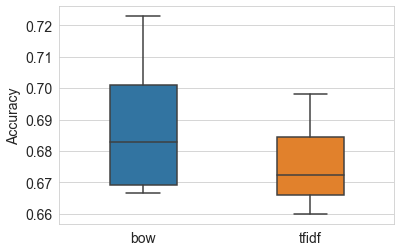

In [81]:
%matplotlib inline
ax = sns.boxplot(data=search_results, width=0.4)
ax.set_ylabel('Accuracy', size=14)
ax.tick_params(labelsize=14)

In [82]:
model_bow = simple_logistic_classify(X_tr_bow, y_tr, X_te_bow, y_te, 'bow', 
                              _C=bow_search.best_params_['C'])
model_tfidf = simple_logistic_classify(X_tr_tfidf, y_tr, X_te_tfidf, y_te, 'tf-idf', 
                              _C=tfidf_search.best_params_['C'])

Test Score with bow features 0.7466666666666667
Test Score with tf-idf features 0.74
